In [28]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [29]:
!unzip -o -q "/content/drive/MyDrive/Colab Notebooks/FacebookNetworkGCN/PatternFlow/recognition/FacebookNetworkGCN/facebook_large.zip"

In [30]:
ls facebook_large

citing.txt                musae_facebook_features.json  README.txt
musae_facebook_edges.csv  musae_facebook_target.csv


In [31]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

Initialise the data

In [32]:
data_dir = pathlib.Path("facebook_large/")

edges = pd.read_csv(
    os.path.join(data_dir, "musae_facebook_edges.csv"),
    sep=",",
    header=0,
    names=["target", "source"],
)

print("Edges shape:", edges.shape)

Edges shape: (171002, 2)


In [33]:
edges.sample(frac=1).head()

,target,source
105136,8640,15114
93698,7442,17523
160220,16866,21496
83059,6361,16895
39652,16427,3434


In [34]:
pages = pd.read_csv(
    os.path.join(data_dir, "musae_facebook_target.csv"), 
    sep=","
)

print("Pages shape:", pages.shape)

Pages shape: (22470, 4)


In [35]:
print(pages.sample(5).T)

                                                    7801  ...          7269
id                                                  7801  ...          7269
facebook_id                              581324208560530  ...  247971402625
page_name    North Carolina Department of Transportation  ...     NYC Media
page_type                                     government  ...    government

[4 rows x 5 columns]


In [36]:
print(pages.page_type.value_counts())

government    6880
company       6495
politician    5768
tvshow        3327
Name: page_type, dtype: int64


In [37]:
class_values = sorted(pages["page_type"].unique())
class_idx = {name: idy for idy, name in enumerate(class_values)}
page_idx = {name: idx for idx, name in enumerate(sorted(pages["id"].unique()))}

pages["id"] = pages["id"].apply(lambda name: page_idx[name])
edges["source"] = edges["source"].apply(lambda name: page_idx[name])
edges["target"] = edges["target"].apply(lambda name: page_idx[name])
pages["page_type"] = pages["page_type"].apply(lambda value: class_idx[value])

Visualise the graph

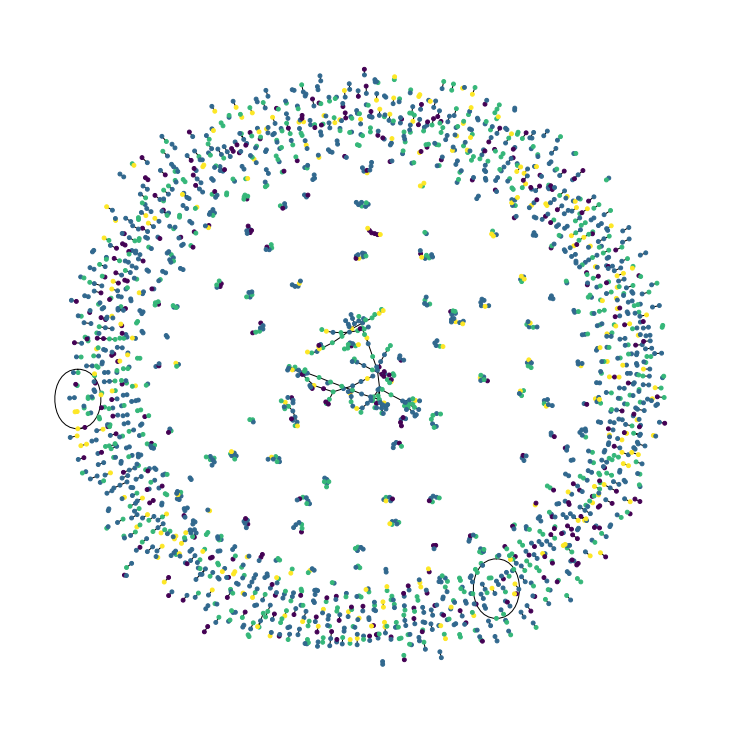

In [38]:
plt.figure(figsize=(10, 10))
colours = pages["page_type"].tolist()
fb_graph = nx.from_pandas_edgelist(edges.sample(n=1500))
page_type = list(pages[pages["id"].isin(list(fb_graph.nodes))]["page_type"])
nx.draw_spring(fb_graph, node_size=15, node_color=page_type)

Split the data into train and test data sets

In [39]:
train_data, test_data = [], []

for _, grouped_data in pages.groupby("page_type"):
    train_data.append(grouped_data[:len(grouped_data.index)//2])
    test_data.append(grouped_data[len(grouped_data.index)//2:])

train_data = pd.concat(train_data).sample(frac=1)
test_data = pd.concat(test_data).sample(frac=1)

print("Train data shape:", train_data.shape)
print("Test data shape:", test_data.shape)

Train data shape: (11234, 4)
Test data shape: (11236, 4)
